In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


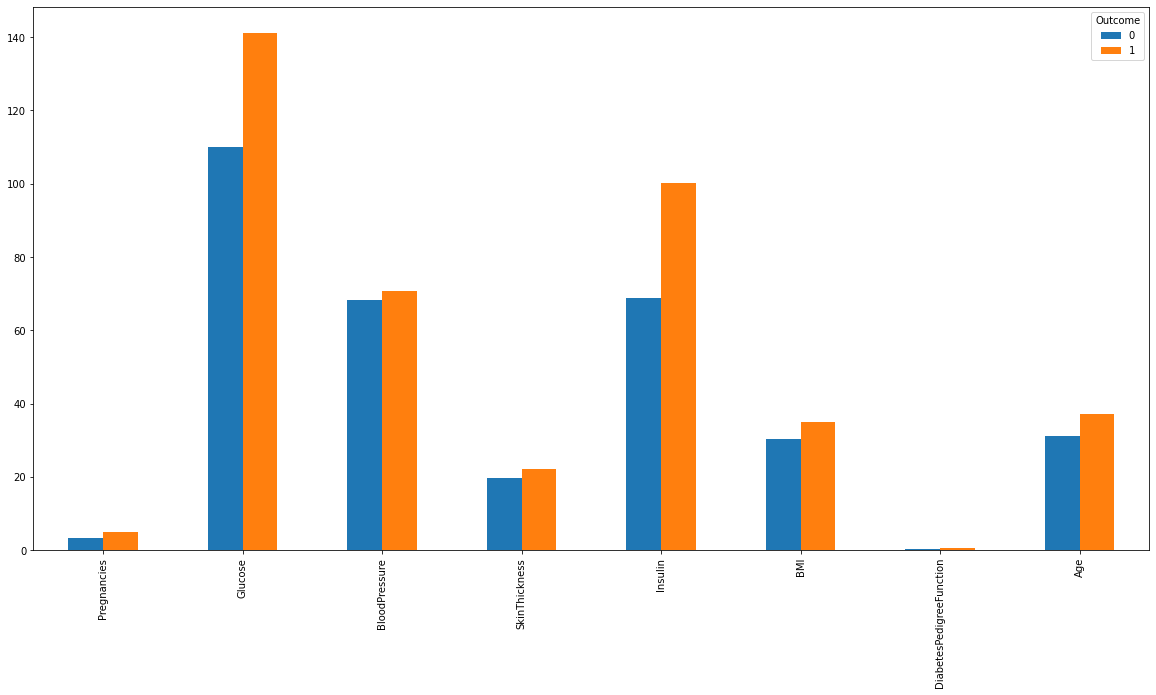

In [7]:
data.groupby("Outcome").mean().transpose().plot.bar(figsize =(20,10))
plt.show()

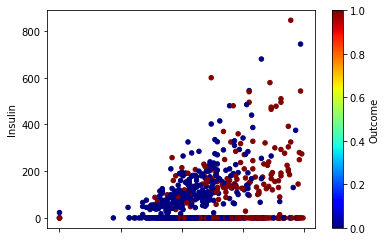

In [12]:
data.plot(kind="scatter",x="Glucose",y="Insulin",c="Outcome",cmap="jet")
plt.show()

In [17]:
x = data.iloc[:,:-1]
y = data["Outcome"]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [20]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred = model.predict(x_test)

In [22]:
(y_pred==y_test.values).mean()

0.7922077922077922

In [23]:
data["Age"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [28]:
l = []
for age in range(21,82):
    left  = data[data["Age"]<age]
    right = data[data["Age"]>age]
    Pn = (left["Outcome"]==0).mean()
    Pd = (right["Outcome"]==1).mean()
    E = (-Pn*np.log(Pn)) -( Pd*np.log(Pd))
    l.append(E)

<ipython-input-28-1376cba95dfc>:7: RuntimeWarning: divide by zero encountered in log
  E = (-Pn*np.log(Pn)) -( Pd*np.log(Pd))
<ipython-input-28-1376cba95dfc>:7: RuntimeWarning: invalid value encountered in double_scalars
  E = (-Pn*np.log(Pn)) -( Pd*np.log(Pd))


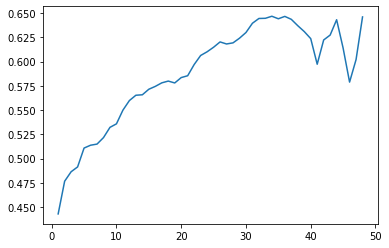

In [30]:
plt.plot(l)
plt.show()

In [36]:
from sklearn import tree
plt.figure(figsize=(200,200))
tree.plot_tree(model)
plt.savefig("tree.png")
plt.show()